# Import keras libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense,Flatten,Dropout
from keras import backend as K
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [4]:
# dimentions of all images
img_width, img_height = 150, 150
TRAIN_DIR = 'C:\\Users\\Sridhar Korada\\Desktop\\Ramana-Malaysia\\dogs-vs-cats\\train\\train'
vadidation_DIR = 'C:\\Users\\Sridhar Korada\\Desktop\\Ramana-Malaysia\\dogs-vs-cats\\validation'
CHANNELS = 3
nb_train_samples = 1000
nb_validation_samples = 100
epochs = 50
batch_size = 20

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (CHANNELS,img_width, img_height) #3,150,150
else:
    input_shape = (img_width, img_height,CHANNELS) #150,150,3
    

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='binary')

Found 20000 images belonging to 2 classes.


In [8]:
#This is the augmentation configuration we will use for testing: 
#only rescaling to keep original images
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
validation_generator = test_datagen.flow_from_directory(
        vadidation_DIR,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='binary')

Found 5000 images belonging to 2 classes.


###### create model  and compile 

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.summary()

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)   

In [11]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
50/50 [==============================] - 52s 1s/step - loss: 0.8383 - accuracy: 0.4790 - val_loss: 0.6922 - val_accuracy: 0.5200


# saving this model

In [12]:
from keras.applications import resnet50
model = resnet50.ResNet50(include_top=True, weights='imagenet')
#model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels.h5')--------------------comment this line
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# Import dependencies
import json
from keras.models import model_from_json

# Step 1: Save Weights + Architecture
model.save_weights('first_try_weights.h5')
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

# Step 2: Save the entire model
model.save('first_try.h5')
print("Saved model to disk")

Saved model to disk


# load and evaluate a saved model - no need to execute

In [13]:
import json
from keras.models import model_from_json
from keras.models import load_model

# Step 1: Load Weights + Architecture
with open('model_architecture.json', 'r') as f:
    new_model = model_from_json(f.read())
new_model.load_weights('first_try_weights.h5')

# Step2: load the entire model
from keras.models import load_model
new_model = load_model('first_try.h5')
print("Loaded model from disk")

# Step3: Evaluate the model
new_model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
print("Evaluated the Loaded model")
new_model.summary()    #---------------------------can check
new_model.get_config()  #------------------can check

Loaded model from disk
Evaluated the Loaded model
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_________________________________________

{'name': 'resnet50',
 'layers': [{'name': 'input_1',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_1'},
   'inbound_nodes': []},
  {'name': 'conv1_pad',
   'class_name': 'ZeroPadding2D',
   'config': {'name': 'conv1_pad',
    'trainable': True,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'name': 'conv1',
   'class_name': 'Conv2D',
   'config': {'name': 'conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution': 'normal',
      'seed': None}},
    'bi

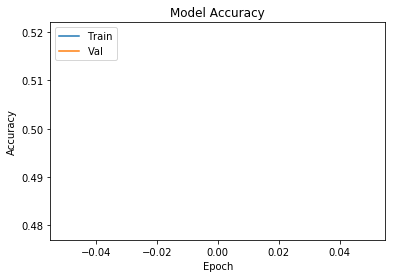

In [14]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

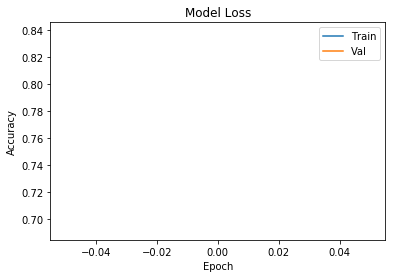

In [15]:
#Visualize the models loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [16]:
import shutil
import os
os.mkdir(test_DIR+'\\cats')
os.mkdir(test_DIR+'\\dogs')

#taking one sample image to predict
test_DIR = 'C:\\Users\\Sridhar Korada\\Desktop\\Ramana-Malaysia\\dogs-vs-cats\\test\\test'

NameError: name 'test_DIR' is not defined

In [ ]:
#Run the model to predict
for i in range(10):
    img_pred = image.load_img(test_DIR+"\\{}.jpg".format(i+1), target_size = (150,150))
    img_pred = image.img_to_array(img_pred)
    img_pred = np.expand_dims(img_pred, axis =0)
    
    result = model.predict(img_pred)
    #print(result)
    
    if result[0][0] == 1:
        prediction = "dog"
        shutil.copyfile(src = test_DIR+"\\{}.jpg".format(i+1), dst = test_DIR+"\\dogs"+"\\dog{}.jpg".format(i+1))
        print(i+1, result, prediction)
    elif result[0][0] == 0:
        prediction = "cat"
        shutil.copyfile(src = test_DIR+"\\{}.jpg".format(i+1), dst = test_DIR+"\\cats"+"\\cat{}.jpg".format(i+1))
        print(i+1, result, prediction)
    else:
        prediction = "skipped, not copied"
        print(i+1, "===================", prediction)